In [2]:
from stardist.models import StarDist2D
import tifffile as tiff
import glob
import os
import numpy as np

In [3]:
def read_image(image_path):   
    with tiff.TiffFile(image_path) as tif:
        image_array = tif.asarray()
    # image_array = np.uint8(image_array)
    return image_array

In [6]:
os.chdir('D:/2024_code')
t2_im_path = glob.glob('./example_img/*T19*HnE*.tiff')[0]
t2_im = read_image(t2_im_path)

In [7]:
model = StarDist2D.from_pretrained('2D_versatile_he')

Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


In [8]:
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

# labels, _ = model.predict_instances(normalize(t2_im_arr,0.1,99.8), prob_thresh=0.5, nms_thresh=0.8)
labels, _ = model.predict_instances_big(normalize(t2_im,0.1,99.8), axes='YXC', block_size=2000, min_overlap=300, context=300, prob_thresh=0.5, nms_thresh=0.8)

effective: block_size=(2000, 2000, 3), min_overlap=(304, 304, 0), context=(304, 304, 0)


100%|██████████| 600/600 [03:07<00:00,  3.20it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'prediction + input overlay')

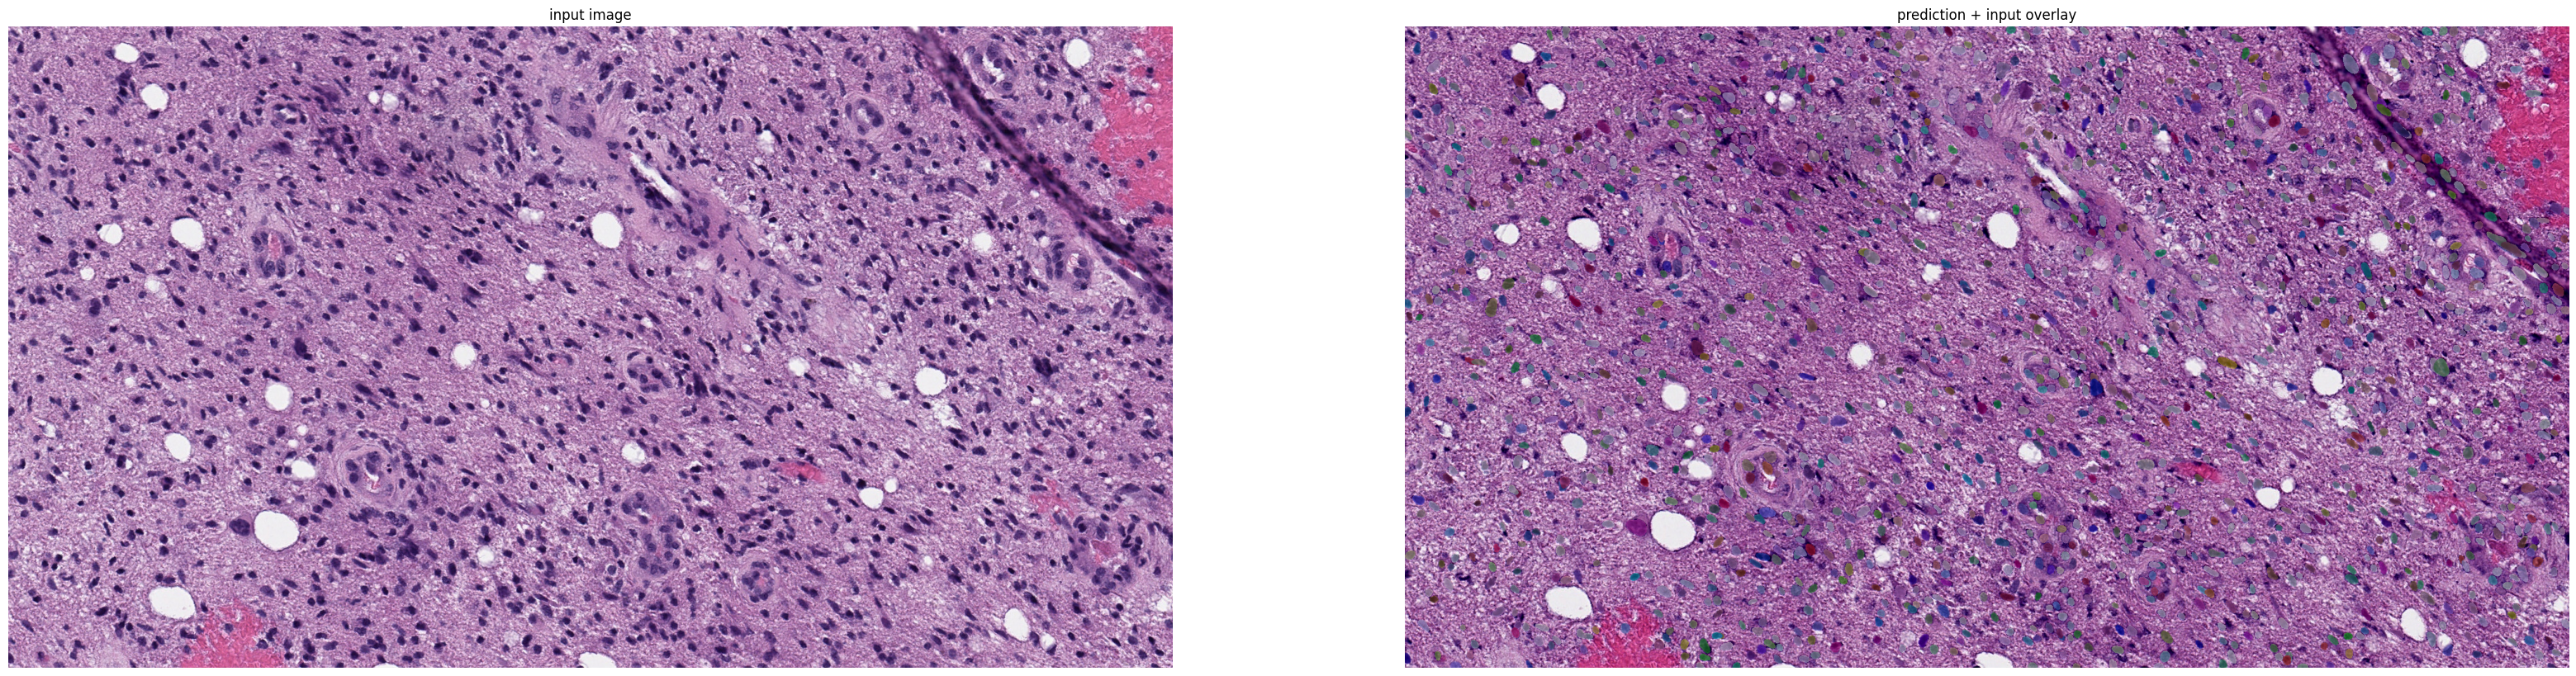

In [11]:
plt.figure(figsize=(40, 20))
plt.subplot(1,2,1)
plt.imshow(t2_im_arr)
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=t2_im_arr))
plt.axis("off")
plt.title("prediction + input overlay")

In [9]:
tiff.imwrite('./example_img/T19_StarDist2D_prediction.tif', labels.astype('uint16'))